# SI 618 Day 10: Clustering

Version 2021.03.28.1.CT

# Clustering

## A few words about pipelines

Consider the following pipeline:

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

pipe = Pipeline([
    ('scale',StandardScaler()),
    ('pca', PCA(n_components=5,random_state=42)),
])

The pipeline can be queried by using `get_params()`:

In [8]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('pca', PCA(n_components=5, random_state=42))],
 'verbose': False,
 'scale': StandardScaler(),
 'pca': PCA(n_components=5, random_state=42),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': 5,
 'pca__random_state': 42,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False}

The `named_steps` attribute holds (unsurprisingly) the named steps of the pipeline:

In [9]:
pipe.named_steps

{'scale': StandardScaler(), 'pca': PCA(n_components=5, random_state=42)}

The steps themselves can be accessed as attributes of the `named_steps` property:

In [10]:
pipe.named_steps.pca

PCA(n_components=5, random_state=42)

And specifics about the step can be modified by assigning new values to them:

In [11]:
pipe.named_steps.pca.n_components=3

In [12]:
pipe.named_steps.pca

PCA(n_components=3, random_state=42)

And you can also use the <estimator>__<parameter> syntax:


In [13]:
pipe.set_params(pca__n_components=2)

Pipeline(steps=[('scale', StandardScaler()),
                ('pca', PCA(n_components=2, random_state=42))])

Ok, on to today's notebook, which consists of two tasks.  First, let's load the music data we generated in an earlier class:

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns

In [15]:
# let's use these imports to make life easier

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [16]:
music = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR4YaVmpag6ucq-Q62adFm8oQz2YQRE7jsiTdE3S8-uxEj8dV6W_rbLHh0AMM4AKeibsDZLWXHQU0rT/pub?gid=0&single=true&output=csv')

In [17]:
music.sample(10)

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock
55,Jenny L,8,8,8,4,6,3,7,5,6,6
39,Hsiao-Han T,8,7,6,3,4,3,8,5,3,5
12,Sasha K,4,7,5,7,2,9,6,6,10,8
34,Michael K,5,9,8,10,8,1,7,7,8,10
32,Yucan D,3,7,9,2,3,2,4,1,8,5
47,Haejeong C,5,7,3,5,2,7,7,3,10,5
43,Sam Lee,4,8,1,3,6,5,8,4,4,10
24,Muhammed H,3,3,5,4,1,6,5,1,8,8
51,Jason C,5,8,5,7,3,8,5,3,8,3
16,Bulgan J,8,8,1,5,2,9,9,6,7,5


## Task
Create a feature matrix and a labels matrix from the music dataframe.  Assign them to `X` and `y`, respectively (note the use of uppercase X and lowercase y).

In [42]:
X = music.drop('Name',axis=1)
y = music[['Name']].copy()

In [43]:
X.head()

,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock
0,7,10,4,3,6,4,10,4,6,8
1,8,6,5,5,10,6,4,9,8,10
2,6,3,2,3,2,10,7,6,8,9
3,3,5,6,5,6,8,2,9,9,10
4,4,5,2,10,2,8,3,4,6,8


In [44]:
y.head()

,Name
0,Chris T
1,Taylor F.
2,Briana W
3,Katie H.
4,N8 May


## Task

Create a pipeline that does the following:

1. Fills NA values with 1
2. Scales each variable to mean=0 and variance=1
3. Uses PCA to reduce the number of dimensions to 5; make sure you set random_state to some constant to allow you to reproduce your results
4. Uses the PCA projections (i.e. the transformed X matrix) as input to agglomerative clustering

Report the percent variance that is retained in the 5-dimensional PCA.

Use the output from the pipeline to create a visualization of the resulting clustering (i.e. create a dendrogram).  Annotate the visulization with a horizontal line that "cuts" the tree at a reasonable level and provide a written summary of each cluster's membership.  Save the resulting dendrogram to a PDF file called 'music_clusters.pdf' (hint: use `plt.savefig()`)

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import AgglomerativeClustering

pipe = Pipeline([
    ('fillwith1', SimpleImputer(strategy="constant", fill_value=1)),
    ('scale',StandardScaler()),
    ('pca', PCA(n_components=5,random_state=42)),
    ('cluster', AgglomerativeClustering(n_clusters=3) ),
])

In [46]:
y_pred = pipe.fit_predict(X)
#y_pred = pipe.predict(X)

In [23]:
y_pred

array([2, 1, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 2,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1])

In [24]:
y.head()

,Name
0,Chris T
1,Taylor F.
2,Briana W
3,Katie H.
4,N8 May


In [25]:
pd.concat([y, pd.DataFrame(y_pred)],axis=1)

,Name,0
0,Chris T,2
1,Taylor F.,1
2,Briana W,0
3,Katie H.,1
4,N8 May,0
5,Yijing C,1
6,Dan K,2
7,Jiaoyang H,1
8,Yanisa K,1
9,Cameron M,2


In [26]:
pipe.named_steps

{'fillwith1': SimpleImputer(fill_value=1, strategy='constant'),
 'scale': StandardScaler(),
 'pca': PCA(n_components=5, random_state=42),
 'cluster': AgglomerativeClustering(n_clusters=3)}

In [27]:
pipe.named_steps.pca.explained_variance_ratio_

array([0.26474683, 0.15880282, 0.13775396, 0.10263509, 0.08600738])

In [28]:
sum(pipe.named_steps.pca.explained_variance_ratio_)

0.7499460712836981

In [29]:
pipe

Pipeline(steps=[('fillwith1', SimpleImputer(fill_value=1, strategy='constant')),
                ('scale', StandardScaler()),
                ('pca', PCA(n_components=5, random_state=42)),
                ('cluster', AgglomerativeClustering(n_clusters=3))])

In [30]:
pipe.named_steps

{'fillwith1': SimpleImputer(fill_value=1, strategy='constant'),
 'scale': StandardScaler(),
 'pca': PCA(n_components=5, random_state=42),
 'cluster': AgglomerativeClustering(n_clusters=3)}

In [31]:
pipe.named_steps.cluster

AgglomerativeClustering(n_clusters=3)

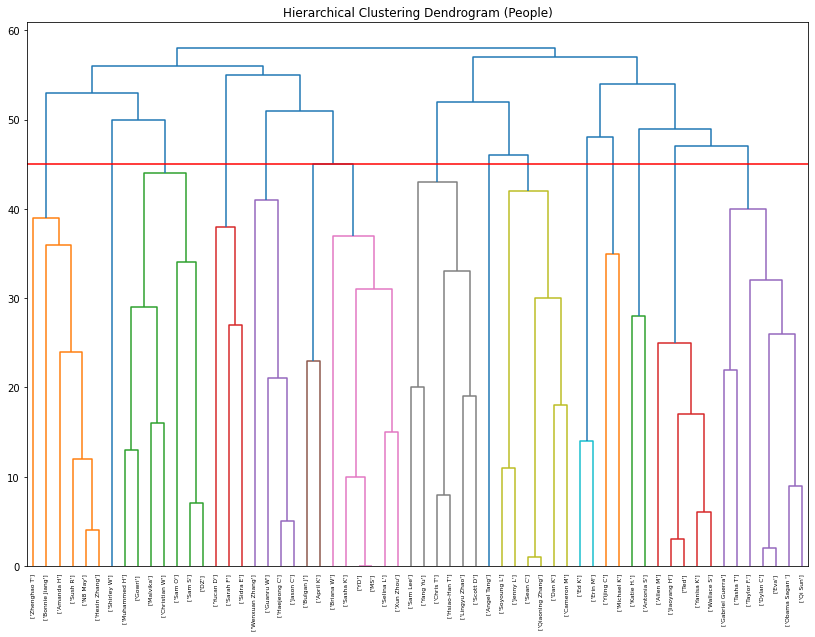

In [32]:
# Authors: Mathew Kallada & Chris Teplovs
# License: BSD 3 clause
"""
=========================================
Plot Hierarachical Clustering Dendrogram 
=========================================
This example plots the corresponding dendrogram of a hierarchical clustering
using AgglomerativeClustering and the dendrogram method available in scipy.
"""

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.named_steps.cluster.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)


    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
    threshold = kwargs.pop('color_threshold')
    plt.axhline(threshold,color='red')

#model = AgglomerativeClustering(n_clusters=8)
#model = model.fit(music_nonames)
plt.figure(figsize=(14,10))
plt.title('Hierarchical Clustering Dendrogram (People)')

plot_dendrogram(pipe,labels=y.values,color_threshold=45)
#plt.axhline(57.5,c='red')
plt.xticks(rotation=90)
plt.savefig('music_clusters.pdf')
plt.show()


## Task

Conduct a k-means clustering of the music data.  Preprocess the data by scaling it and performing a PCA and retaining 2 dimensions.  Use the PCA scores as input to the clustering. Use silhouette plots to determine the optimal number of clusters.  If time permits, experiment with changing the number of principal components.  Be sure to set your random_state to allow you to reproduce your results.

Note that you do not need to use a pipeline, although doing so may make your life easier.

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

pipe = Pipeline([
    ('fillwith1', SimpleImputer(strategy="constant", fill_value=1)),
    ('scale',StandardScaler()),
    ('pca', PCA(n_components=2,random_state=42)),
    ('cluster', KMeans(n_clusters=2) ),
])

In [41]:
X

array([[ 7, 10,  4,  3,  6,  4, 10,  4,  6,  8],
       [ 8,  6,  5,  5, 10,  6,  4,  9,  8, 10],
       [ 6,  3,  2,  3,  2, 10,  7,  6,  8,  9],
       [ 3,  5,  6,  5,  6,  8,  2,  9,  9, 10],
       [ 4,  5,  2, 10,  2,  8,  3,  4,  6,  8],
       [ 4, 10,  6,  9,  7,  2,  4,  3,  4,  8],
       [ 8,  7,  9,  5,  8,  9, 10,  8,  7,  4],
       [ 8,  9,  5,  6,  6,  7,  7,  5,  9,  8],
       [ 5,  8,  7,  8,  7,  9,  8,  7, 10,  8],
       [ 6,  8,  9,  7,  3,  8,  9, 10,  3,  3],
       [ 7,  8,  6,  2,  5,  7,  9,  3,  8,  5],
       [ 6,  6,  5,  8,  5,  9,  8,  6,  8, 10],
       [ 4,  7,  5,  7,  2,  9,  6,  6, 10,  8],
       [ 7,  7,  8,  5,  5,  8,  6,  5,  8, 10],
       [ 6,  8,  8,  5,  8,  2,  7,  7,  8,  2],
       [ 8,  6,  6,  8,  5,  8,  4,  3,  8,  6],
       [ 8,  8,  1,  5,  2,  9,  9,  6,  7,  5],
       [ 5,  8,  2,  6,  2,  9,  5,  2,  4,  7],
       [ 4,  7, 10,  1,  2,  8,  5,  1, 10,  2],
       [ 6,  5,  3,  2,  6,  9,  4,  8,  9,  8],
       [ 9,  4,  3, 

In [35]:
X= X.values

For n_clusters = 2 The average silhouette_score is : 0.4976718443142433
For n_clusters = 3 The average silhouette_score is : 0.38220008087171314
For n_clusters = 4 The average silhouette_score is : 0.33113609360199764
For n_clusters = 5 The average silhouette_score is : 0.378672312140578
For n_clusters = 6 The average silhouette_score is : 0.3784310528799456


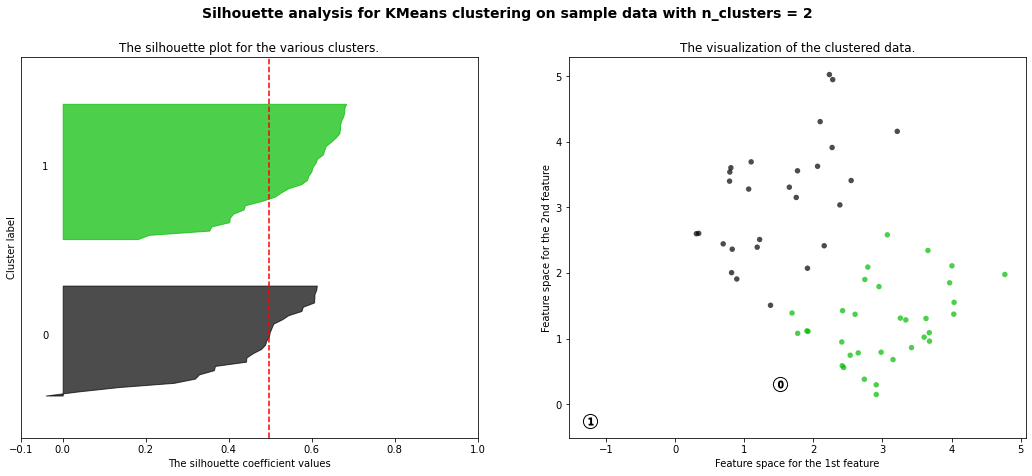

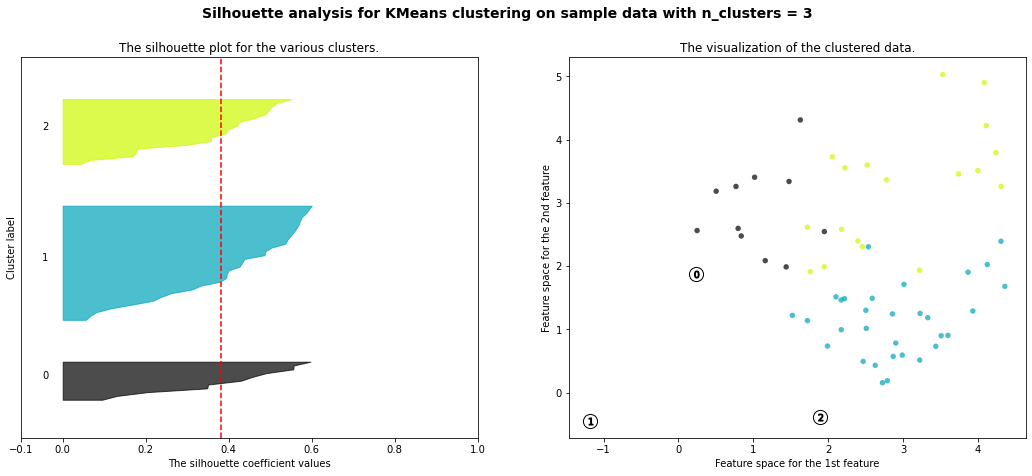

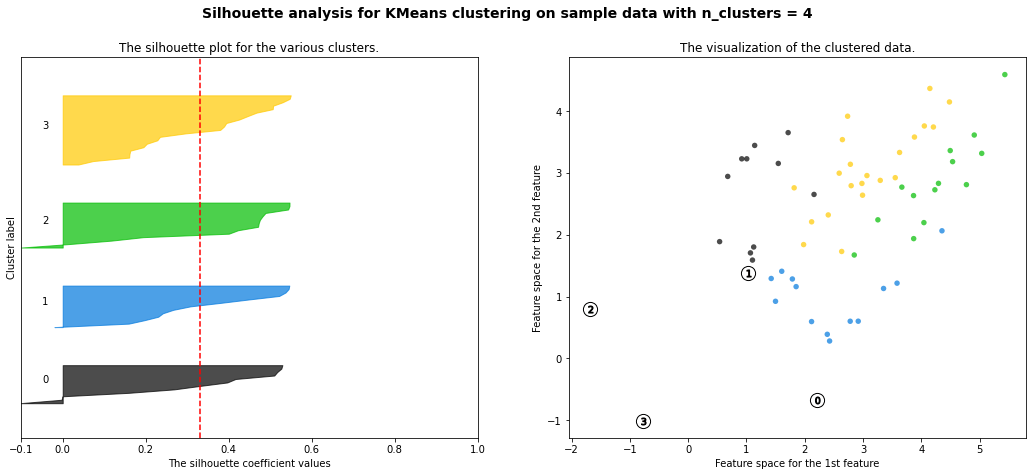

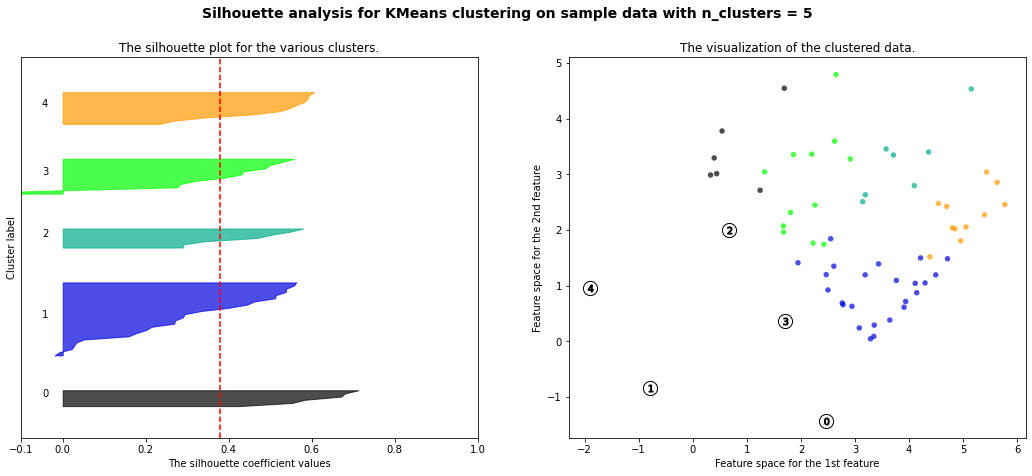

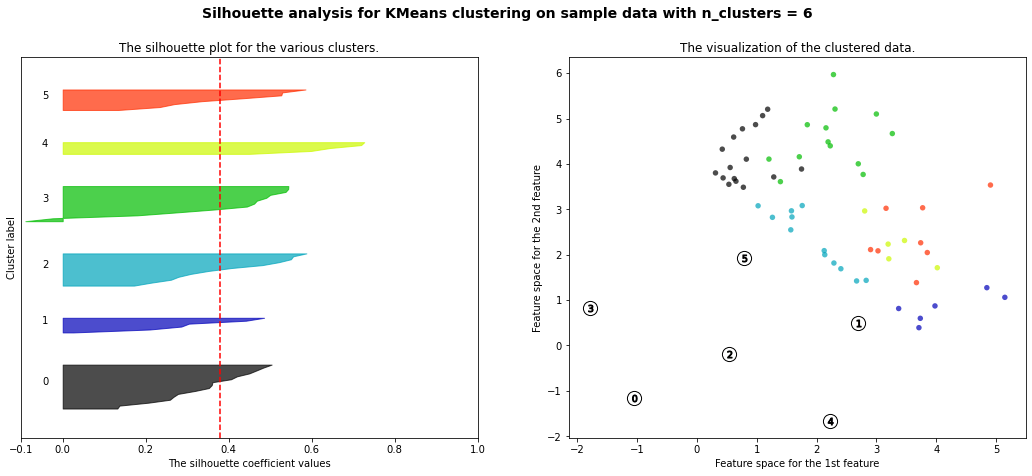

In [54]:
# based on https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm # colormaps
import numpy as np


#X = music_nonames.values
#y = music_names

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 42 for reproducibility.
    #clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    #cluster_labels = clusterer.fit_predict(X)
    
    pipe = Pipeline([
        ('fillwith1', SimpleImputer(strategy="constant", fill_value=1)),
        ('scale',StandardScaler()),
        ('pca', PCA(n_components=2,random_state=42)),
        ('cluster', KMeans(n_clusters=n_clusters) ),
    ])
    cluster_labels = pipe.fit_predict(X)
    Xtransformed = pipe.transform(X)
    clusterer = pipe.named_steps.cluster

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Xtransformed, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Xtransformed, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Xtransformed[:, 0], Xtransformed[:, 1], marker='o', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [37]:
pipe.transform(X)

array([[3.67709102, 1.09062359],
       [3.97162387, 1.85134691],
       [0.825715  , 2.36387073],
       [1.91441201, 2.07353825],
       [1.77011437, 3.55990086],
       [2.64897363, 0.78213426],
       [4.03640189, 1.55337746],
       [2.91005278, 0.14765035],
       [2.73760473, 0.38083961],
       [3.33774547, 1.285675  ],
       [2.94918649, 1.79387371],
       [2.42251307, 1.42623099],
       [0.81600043, 2.00624425],
       [2.4390258 , 0.55932826],
       [4.00556428, 2.11067064],
       [1.37965613, 1.50868506],
       [1.90629522, 1.11790789],
       [0.69485841, 2.44541079],
       [3.21371001, 4.16136196],
       [1.69136967, 1.39056947],
       [2.78756854, 2.09142423],
       [1.06357419, 3.28105964],
       [2.54662347, 3.41154166],
       [2.15666444, 2.41639807],
       [0.79064651, 3.54089831],
       [2.60365715, 1.37087815],
       [2.74508546, 1.90216559],
       [0.89142131, 1.9098135 ],
       [3.07018776, 2.58312329],
       [2.27130466, 3.91478509],
       [0.